<a href="https://colab.research.google.com/github/nitinn01/Stock-Price-Prediction-and-Forecasting-using-stacked-LSTM/blob/main/Stock_Price_Prediction_and_Forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Prediction and Forecasting using stacked LSTM

*Libraries used: keras and tensorflor*

In [77]:
## Data Collection
import pandas_datareader as pdr

In [78]:
df = pdr.get_data_tiingo('AAPL', api_key='0f09108d1c25b08fe8a36b208abe6836bc05ee11')

In [79]:
##converting data to pdf
df.to_csv('AAPL.csv')

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('AAPL.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-22 00:00:00+00:00,98.66,99.3000,98.31,99.260,28313669,23.038437,23.187885,22.956707,23.178545,113254676,0.0,1.0
1,AAPL,2016-07-25 00:00:00+00:00,97.34,98.8400,96.92,98.250,40382921,22.730199,23.080469,22.632123,22.942696,161531684,0.0,1.0
2,AAPL,2016-07-26 00:00:00+00:00,96.67,97.9700,96.42,96.820,56239822,22.573745,22.877312,22.515367,22.608772,224959288,0.0,1.0
3,AAPL,2016-07-27 00:00:00+00:00,102.95,104.3500,102.75,104.265,92344820,24.040209,24.367128,23.993507,24.347280,369379280,0.0,1.0
4,AAPL,2016-07-28 00:00:00+00:00,104.34,104.4500,102.82,102.830,39869839,24.364793,24.390480,24.009853,24.012188,159479356,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2021-07-14 00:00:00+00:00,149.15,149.5700,147.68,148.100,127050785,149.150000,149.570000,147.680000,148.100000,127050785,0.0,1.0
1253,AAPL,2021-07-15 00:00:00+00:00,148.48,150.0000,147.09,149.240,106820297,148.480000,150.000000,147.090000,149.240000,106820297,0.0,1.0
1254,AAPL,2021-07-16 00:00:00+00:00,146.39,149.7600,145.88,148.460,93251426,146.390000,149.760000,145.880000,148.460000,93251426,0.0,1.0
1255,AAPL,2021-07-19 00:00:00+00:00,142.45,144.0700,141.67,143.750,121434571,142.450000,144.070000,141.670000,143.750000,121434571,0.0,1.0


In [98]:
df1 = df.reset_index()['close']

In [99]:
df1[1228:]

1228    127.13
1229    126.11
1230    127.35
1231    130.48
1232    129.64
1233    130.15
1234    131.79
1235    130.46
1236    132.30
1237    133.98
1238    133.70
1239    133.41
1240    133.11
1241    134.78
1242    136.33
1243    136.96
1244    137.27
1245    139.96
1246    142.02
1247    144.57
1248    143.24
1249    145.11
1250    144.50
1251    145.64
1252    149.15
1253    148.48
1254    146.39
1255    142.45
1256    146.15
Name: close, dtype: float64

In [100]:
df1.shape

(1257,)

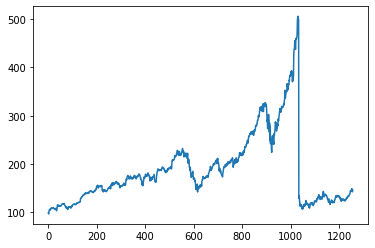

In [101]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [102]:
df1

0        98.66
1        97.34
2        96.67
3       102.95
4       104.34
         ...  
1252    149.15
1253    148.48
1254    146.39
1255    142.45
1256    146.15
Name: close, Length: 1257, dtype: float64

In [103]:
##LSTM are sensitive to the scale of the data, so we apply MinMax scalar

In [104]:
import numpy as np

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [106]:
df1.shape

(1257, 1)

In [107]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data, test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [108]:
training_size, test_size

(879, 378)

In [109]:
train_data

array([[0.00486053],
       [0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.04457525],
       [0.04130233],
       [0.04127791],
       [0.04122906],
       [0.04384251],
       [0.03917737],
       [0.03959259],
       [0.04010552],
       [0.042

In [110]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] ## 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)


In [111]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [112]:
print(X_train)

[[0.00486053 0.00163646 0.         ... 0.03773631 0.04220605 0.04061844]
 [0.00163646 0.         0.01533877 ... 0.04220605 0.04061844 0.04523472]
 [0.         0.01533877 0.01873382 ... 0.04061844 0.04523472 0.04523472]
 ...
 [0.28325436 0.28281471 0.25882956 ... 0.52015046 0.52186019 0.53805383]
 [0.28281471 0.25882956 0.26823311 ... 0.52186019 0.53805383 0.52760002]
 [0.25882956 0.26823311 0.26254213 ... 0.53805383 0.52760002 0.5243271 ]]


In [113]:
print(X_test.shape), print(Y_test.shape)

(277, 100)
(277,)


(None, None)

In [116]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [118]:
##Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [120]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [123]:
X_train[:100]

array([[[0.00486053],
        [0.00163646],
        [0.        ],
        ...,
        [0.03773631],
        [0.04220605],
        [0.04061844]],

       [[0.00163646],
        [0.        ],
        [0.01533877],
        ...,
        [0.04220605],
        [0.04061844],
        [0.04523472]],

       [[0.        ],
        [0.01533877],
        [0.01873382],
        ...,
        [0.04061844],
        [0.04523472],
        [0.04523472]],

       ...,

       [[0.03773631],
        [0.04220605],
        [0.04061844],
        ...,
        [0.12190416],
        [0.12417566],
        [0.12307655]],

       [[0.04220605],
        [0.04061844],
        [0.04523472],
        ...,
        [0.12417566],
        [0.12307655],
        [0.12178203]],

       [[0.04061844],
        [0.04523472],
        [0.04523472],
        ...,
        [0.12307655],
        [0.12178203],
        [0.12771726]]])

In [125]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 265ms/step - loss: 0.0118 - val_loss: 0.0389
Epoch 2/100
13/13 [==============================] - 2s 164ms/step - loss: 0.0035 - val_loss: 0.0264
Epoch 3/100
13/13 [==============================] - 2s 161ms/step - loss: 0.0012 - val_loss: 0.0259
Epoch 4/100
13/13 [==============================] - 2s 161ms/step - loss: 6.6266e-04 - val_loss: 0.0284
Epoch 5/100
13/13 [==============================] - 2s 164ms/step - loss: 5.0045e-04 - val_loss: 0.0280
Epoch 6/100
13/13 [==============================] - 2s 162ms/step - loss: 4.7874e-04 - val_loss: 0.0254
Epoch 7/100
13/13 [==============================] - 2s 169ms/step - loss: 4.6253e-04 - val_loss: 0.0250
Epoch 8/100
13/13 [==============================] - 2s 159ms/step - loss: 4.4180e-04 - val_loss: 0.0266
Epoch 9/100
13/13 [==============================] - 2s 169ms/step - loss: 4.1490e-04 - val_loss: 0.0290
Epoch 10/100
13/13 [==============================] - 2s 160ms/step

In [127]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [129]:
###lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict = model.predict(X_test)

In [131]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [139]:
### Calculate RMSE perfomance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

186.67318745995095

In [140]:
##Test Data RMSE
math.sqrt(mean_squared_error(Y_test, test_predict))

223.5931224951866

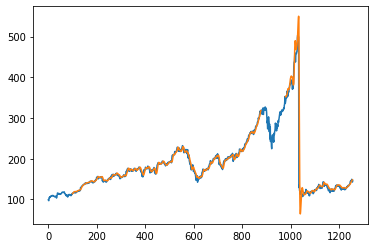

In [142]:
###Plotting 
#Shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
## Shift test predicts for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
trainPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]= test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [143]:
len(test_data)

378

In [145]:
a = 378-100
a


278

In [147]:
X_input=test_data[278:].reshape(1,-1)
X_input.shape

(1, 100)

In [149]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [151]:
temp_input

[0.060060573494211345,
 0.07600996531678961,
 0.0694885447706512,
 0.06201455717844756,
 0.05730057154022761,
 0.060451370231058565,
 0.048092423428264364,
 0.05963313956328464,
 0.056934199599433355,
 0.061770309217917985,
 0.0594988031849934,
 0.06672854281666746,
 0.07058766059303401,
 0.06860925211274488,
 0.05827756338234574,
 0.05695862439548627,
 0.06526305505349028,
 0.06318694738898933,
 0.057202872356015844,
 0.0584241121586635,
 0.05993844951394656,
 0.060378095842899715,
 0.05673880123100972,
 0.06223438034292417,
 0.06431048800742512,
 0.07139367886278153,
 0.072150847540423,
 0.0762786380733721,
 0.08228713790239855,
 0.0887230716623516,
 0.08443651995505841,
 0.09222802989595041,
 0.08636607884324166,
 0.09239900346832103,
 0.09156856040252065,
 0.09322944653412146,
 0.0890039568169606,
 0.08995652386302572,
 0.0861462556787651,
 0.09195935713936787,
 0.092936348981486,
 0.09213033071173854,
 0.09015192223144941,
 0.08990767427091984,
 0.08497386546822339,
 0.08761174344

In [156]:
#Demonstrate prediction for next 10 days
from numpy import array
lst_output = []
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    X_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1, n_steps, 1))
    #print(X_input)
    yhat = model.predict(X_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1,n_steps,1))
    yhat = model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
  print(lst_output)

[0.12438986]
101
[[0.12438986450433731]]
1 day input [0.07600997 0.06948854 0.06201456 0.05730057 0.06045137 0.04809242
 0.05963314 0.0569342  0.06177031 0.0594988  0.06672854 0.07058766
 0.06860925 0.05827756 0.05695862 0.06526306 0.06318695 0.05720287
 0.05842411 0.05993845 0.0603781  0.0567388  0.06223438 0.06431049
 0.07139368 0.07215085 0.07627864 0.08228714 0.08872307 0.08443652
 0.09222803 0.08636608 0.092399   0.09156856 0.09322945 0.08900396
 0.08995652 0.08614626 0.09195936 0.09293635 0.09213033 0.09015192
 0.08990767 0.08497387 0.08761174 0.07615651 0.07676713 0.0807728
 0.08192077 0.07371403 0.0714181  0.06374872 0.06912217 0.07517952
 0.0722974  0.06882908 0.06843828 0.07483758 0.07024571 0.07432465
 0.07383616 0.07371403 0.06987934 0.06824288 0.06743686 0.069342
 0.06562943 0.07136925 0.07139368 0.07344536 0.07439793 0.0719066
 0.07493527 0.08258024 0.08052855 0.08177422 0.08577988 0.08253139
 0.08702555 0.09112891 0.09044502 0.0897367  0.08900396 0.0930829
 0.09686874 0.

In [158]:
day_new = np.arange(1,101)
day_pred=np.arange(101,131)

In [159]:
import matplotlib.pyplot as plt
len(df1)

1257

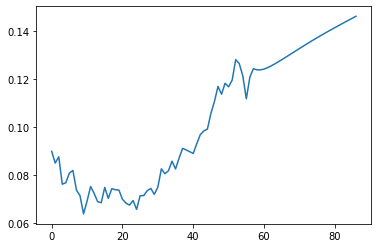

In [166]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

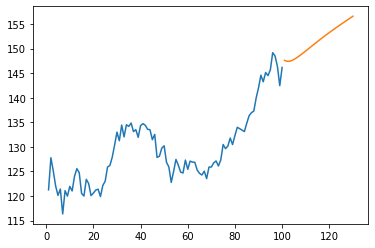

In [164]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

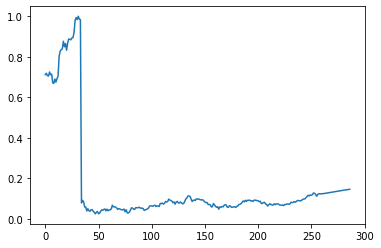

In [165]:
plt.plot(df3[1000:])